In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [25]:
@np.vectorize
def psi_haar(u, t, lam):
    """Computationally inefficient implementation 
    of the Haar wavelet.
    """
    def psi_(u):
        if u >= 0 and u <= 0.5:
            return 1
        if u >= 0.5 and u < 1:
            return -1
        return 0
    return abs(lam)**(-0.5) * psi_((u - t) / lam)

In [ ]:
N = 100

data = {
    "u": [],
    "shift": [],
    "scale": [],
    "psi": [],
}

for lam in np.sqrt(2)**np.arange(4):
    for t in np.arange(-2, 3):
        u = np.linspace(t-lam*1.5, t+lam*1.5, num=N)
        data["u"].append(u)
        data["shift"].append(np.repeat(t, N))
        data["scale"].append(np.repeat(lam, N))
        data["psi"].append(psi_haar(u, t, lam))
        
for key, val in data.items():
    data[key] = np.concatenate(val)

# Create a DataFrame from the arrays
data = pd.DataFrame(data)

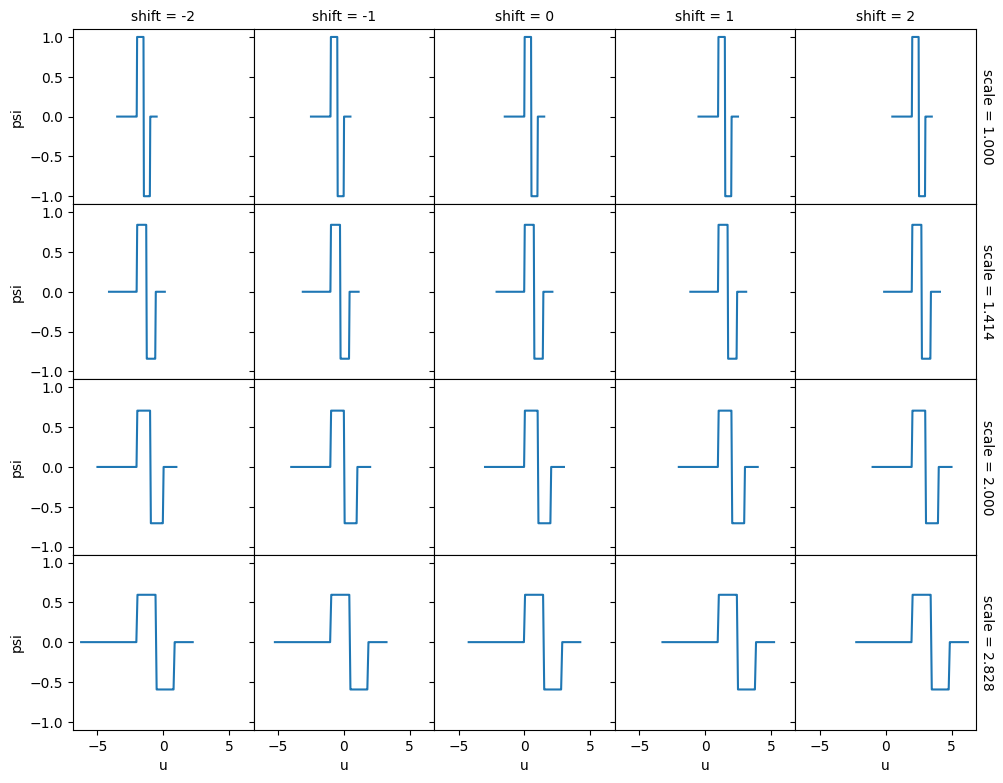

In [37]:
g = sns.FacetGrid(
    data, row="scale", col="shift",
    margin_titles=True, despine=False,
    height=2,
)

# Map the line plots to each subplot
g.map_dataframe(sns.lineplot, x='u', y='psi')
g.set_titles(row_template="scale = {row_name:.3f}")
g.figure.subplots_adjust(wspace=0, hspace=0)

plt.show()